In [12]:
import numpy as np
import matplotlib.pyplot as plt
#mport matplotlib
#%matplotlib qt5
import os
from astropy.io import fits

In [ ]:
import numpy as np
import gurobipy
import pickle
import dill


class PickleModel(gurobipy.Model):

    # check if __getstate__ already exists, if so, don't redefine

    def __getstate__(self):
    #    return self._Model__constrs
        return {'vars':self.getVars(), 'objs':self.getObjective(), 'constrs':self.getConstrs()}

    
n = 10

m = PickleModel()

data = np.ones((n))


mVars = m.addVars(n, lb=0.0, ub=1.0)

obj_expr = gurobipy.LinExpr(data, mVars.values())
m.setObjective(obj_expr, sense=gurobipy.GRB.MINIMIZE)
m.update()

mVars = m.getVars()
terms = np.ones((10))/2
lhs = gurobipy.LinExpr(terms, mVars)
m.addLConstr(lhs=lhs, sense=gurobipy.GRB.LESS_EQUAL, rhs=0)
m.update()

#m.__getstate__()


with open('test.pkl', 'wb') as f:
    pickle.dump(m, f)

In [ ]:
def boost(old, new):
    return (old - new)/old*100

In [ ]:
orig = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/orig/48-test/mprofile_20190114170632.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/perf/48-test/mprofile_20190114163948.dat', delimiter=' ', skip_header=100,skip_footer=5)

orig_rt = (orig[-1,2]-orig[0,2])
perf_rt = (perf[-1,2]-perf[0,2])

post_ft = 1547501990.5670567 -  perf[0,2]
optimize = 1547502004.3054442 - perf[0,2]

orig_mem = max(orig[:,1])/1024
perf_mem = max(perf[:,1])/1024

plt.plot((orig[:,2]-orig[0,2]), orig[:,1]/1024, 'k-.',
         label='before: rt={0:.2f}s, max={1:.2f}GB'.format(orig_rt, orig_mem))
plt.plot((perf[:,2]-perf[0,2]), perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}s, max={1:.2f}GB'.format(perf_rt, perf_mem))

plt.axvline(x=optimize, label='Solver (after only)')
#plt.axvline(x=post_ft)

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend(loc='lower right')
plt.show

In [ ]:
orig = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/orig/144-test/mprofile_20190114170914.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/perf/144-test/mprofile_20190114164427.dat', delimiter=' ', skip_header=100,skip_footer=5)


optimize = (1547502454.6818483 - perf[0,2])/60

orig_rt = (orig[-1,2]-orig[0,2])/60
perf_rt = (perf[-1,2]-perf[0,2])/60

orig_mem = max(orig[:,1])/1024
perf_mem = max(perf[:,1])/1024

plt.plot((orig[:,2]-orig[0,2])/60, orig[:,1]/1024, 'k-.',
         label='before: rt={0:.2f}Min, max={1:.2f}GB'.format(orig_rt, orig_mem))
plt.plot((perf[:,2]-perf[0,2])/60, perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}Min, max={1:.2f}GB'.format(perf_rt, perf_mem))

plt.axvline(x=optimize, label='Solver (after only)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 144: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend()
plt.show

In [ ]:
orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/orig/486-test/mprofile_20190114174104.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/486-test/mprofile_20190114215323.dat', delimiter=' ', skip_header=100,skip_footer=5)

#orig = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/orig/486-test/mprofile_20190114174104.dat', delimiter=' ', skip_header=100,skip_footer=5)
#perf = np.genfromtxt('/Users/jamie/dev/makidon-labs/SCDA-4/perf/486-test/mprofile_20190114195506.dat', delimiter=' ', skip_header=100,skip_footer=5)
#perf = np.genfromtxt('/Users/jamie/dev/makidon-labs/jnoss/486-test/SCDA2/mprofile_20190111152244.dat', delimiter=' ', skip_header=100,skip_footer=5)

optimize = (1547525330.6178353 - perf[0,2])/60

orig_rt = 2*24*60#(orig[-1,2]-orig[1,2])/60
perf_rt = (perf[-1,2]-perf[0,2])/60

orig_mem = max(orig[:,1])/1024
perf_mem = max(perf[:,1])/1024

plt.plot((orig[:,2]-orig[0,2])/60, orig[:,1]/1024, 'k-.',
         label='before: rt=48hr (estimate), max={0:.2f}GB'.format(orig_mem))
plt.plot((perf[:,2]-perf[0,2])/60, perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}Min, max={1:.2f}GB'.format(perf_rt, perf_mem))

plt.axvline(x=optimize, label='Solver (after only) ~34GB pre optimize()')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 486: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend()
plt.show

In [ ]:
apod48 = fits.getdata('/Users/jamie/dev/makidon-labs/SCDA-4/perf/48-test/apodizers/HiCAT/Test_S_jnoss_HiCAT_MaxTau_nPup=0048_nFPM=050_APLC_rMask=4.271_IWA=5.0_OWA=10.0_BW=0.10_nlam=03_C=8.0_LS-Ann-bw-ID345-OD0807_gurobipy.fits')
apod144 = fits.getdata('/Users/jamie/dev/makidon-labs/SCDA-4/perf/144-test/apodizers/HiCAT/Test_S_jnoss_HiCAT_MaxTau_nPup=0144_nFPM=050_APLC_rMask=4.271_IWA=5.0_OWA=10.0_BW=0.10_nlam=03_C=8.0_LS-Ann-bw-ID345-OD0807_gurobipy.fits')
apod486 = fits.getdata('/Users/jamie/dev/makidon-labs/jnoss/486-test/apodizers/HiCAT/Test_S_jnoss_HiCAT_MaxTau_nPup=0486_nFPM=050_APLC_rMask=4.271_IWA=5.0_OWA=10.0_BW=0.10_nlam=03_C=8.0_LS-Ann-bw-ID345-OD0807_gurobipy.fits')

plt.subplot(1,3,1)
plt.imshow(apod48, cmap='gray')
plt.title('nPup = 48')

plt.subplot(1,3,2)
plt.imshow(apod144, cmap='gray')
plt.title('nPup = 144')

plt.subplot(1,3,3)
plt.imshow(apod486, cmap='gray')
plt.title('nPup = 486')

In [ ]:
apod144 = fits.getdata('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test/apodizers/HiCAT/Test_S_jnoss_HiCAT_MaxTau_nPup=0144_nFPM=050_APLC_rMask=4.271_IWA=5.0_OWA=10.0_BW=0.10_nlam=03_C=8.0_LS-Ann-bw-ID345-OD0807_gurobipy.fits')
apod144_robust = fits.getdata('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test-robust/apodizers/HiCAT/Test_S_jnoss_HiCAT_MaxTau_nPup=0144_nFPM=050_APLC_rMask=4.271_IWA=5.0_OWA=10.0_BW=0.10_nlam=03_C=8.0_LS-Ann-bw-ID345-OD0807_LSRobustness=1_PixMax=01gurobipy.fits')

plt.subplot(1,2,1)
plt.imshow(apod144, cmap='gray')
plt.title('nPup = 144')

plt.subplot(1,2,2)
plt.imshow(apod144_robust, cmap='gray')
plt.title('nPup = 144 robust')


In [ ]:
orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test/mprofile_20190114164427.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test-robust/mprofile_20190111152324.dat', delimiter=' ', skip_header=100,skip_footer=5)


optimize = (1547502454.6818483 - orig[0,2])/60

orig_rt = (orig[-1,2]-orig[0,2])/60
perf_rt = (perf[-1,2]-perf[0,2])/60

orig_mem = max(orig[:,1])/1024
perf_mem = max(perf[:,1])/1024

plt.plot((orig[:,2]-orig[0,2])/60, orig[:,1]/1024, 'k-.',
         label='before: rt={0:.2f}Min, max={1:.2f}GB'.format(orig_rt, orig_mem))
plt.plot((perf[:,2]-perf[0,2])/60, perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}Min, max={1:.2f}GB'.format(perf_rt, perf_mem))

plt.axvline(x=optimize, label='Solver (after only)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 144: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend()
plt.show

In [ ]:
orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/48-test/mprofile_20190114163948.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190116145349.dat', delimiter=' ', skip_header=100,skip_footer=5)

orig_rt = (orig[-1,2]-orig[0,2])
perf_rt = (perf[-1,2]-perf[0,2])

optimize = 1547502004.3054442 - orig[0,2]

orig_mem = max(orig[:,1])/1024
perf_mem = max(perf[:,1])/1024

plt.plot((orig[:,2]-orig[0,2]), orig[:,1]/1024, 'k-.',
         label='before: rt={0:.2f}s, max={1:.2f}GB'.format(orig_rt, orig_mem))
plt.plot((perf[:,2]-perf[0,2]), perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}s, max={1:.2f}GB'.format(perf_rt, perf_mem))

plt.axvline(x=optimize, label='Solver (after only)')
#plt.axvline(x=post_ft)

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend(loc='lower right')
plt.show

In [ ]:
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/486-test-robust/mprofile_20190116210009.dat', delimiter=' ', skip_header=100,skip_footer=5)

optimize = (1547712431.4537406 - perf[0,2])/60**2

plt.plot((perf[:,2]-perf[0,2])/60**2, perf[:,1]*1.024/1e3, 'k-', label='Memory')

plt.axvline(x=optimize, label='gurobipy.Model.optimize()', color='r')

plt.axvline(x=5.1, label='gurobi model construction', color='b')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Hours')
plt.title('nPup = 486: Robust w/ 5 Lyot stop configurations')
plt.legend()
plt.show

In [ ]:
(3652 + 18368)/60**2

In [ ]:
18368/60**2

In [ ]:
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/presolve-thread-test/mprofile_20190118142850.dat', delimiter=' ')
perf1 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/presolve-thread-test/mprofile_20190118143113.dat', delimiter=' ')
perf2 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/presolve-thread-test/mprofile_20190118143221.dat', delimiter=' ')

plt.plot((perf[:,2]-perf[0,2]), perf[:,1]*1.024/1e3, 'b-', label='No presolve, 6 threads')
plt.plot((perf1[:,2]-perf1[0,2]), perf1[:,1]*1.024/1e3, 'k-', label='Presolve, 6 threads')
plt.plot((perf2[:,2]-perf2[0,2]), perf2[:,1]*1.024/1e3, 'r-', label='No presolve, 1 thread')




plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48: 22efc82c1956ff7e7a8a1915e6fbcce17ca199ce')
plt.legend()
plt.show

In [ ]:
start

In [ ]:
field_constr

In [ ]:
orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test/mprofile_20190114164427.dat', delimiter=' ', skip_header=100,skip_footer=5)
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA-4/perf/144-test/mprofile_20190117145526.dat', delimiter=' ', skip_header=100,skip_footer=5)


optimize = (1547502454.6818483 - perf[0,2])/60

orig_rt = (orig[-1,2]-orig[0,2])/60
perf_rt = (perf[-1,2]-perf[0,2])/60

orig_mem = max(orig[:,1])*1.024/1e3
perf_mem = max(perf[:,1])*1.024/1e3

plt.plot((orig[:,2]-orig[0,2])/60, orig[:,1]/1024, 'k-.',
         label='before: rt={0:.2f}Min, max={1:.2f}GB'.format(orig_rt, orig_mem))
plt.plot((perf[:,2]-perf[0,2])/60, perf[:,1]/1024, 'r-',
         label='after: rt={0:.2f}Min, max={1:.2f}GB'.format(perf_rt, perf_mem))

#plt.axvline(x=optimize, label='Solver (after only)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 144: {0:.2f}x faster, {1:.2f}% less memory'.format(orig_rt/perf_rt, (1-perf_mem/orig_mem)*100))
plt.legend()
plt.show

In [ ]:
1/16

In [ ]:
20383.96/60**2

In [ ]:
endian = '<'
if respType in (int):
    read_type = 'I'
    valView = val[:,4]
elif respType in (float):
    read_type = 'd'
    valView = val
else:
    raise NotImplementedError
    
value = struct.unpack(endian+read_type, valView)

In [ ]:
sft = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122155015.dat', delimiter=' ', skip_header=1)
sft2 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122161632.dat', delimiter=' ', skip_header=1)

dft = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122155158.dat', delimiter=' ', skip_header=1)
dft2 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122160952.dat', delimiter=' ', skip_header=1)

dft_numexpr = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122155753.dat', delimiter=' ', skip_header=1)
dft_numexpr2 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122160601.dat', delimiter=' ', skip_header=1)



sft_optimize = (1548181620.612771 - orig[0,2])/60
dft_optimize = (1548183086.787127 - perf[0,2])/60

print(sft_optimize, dft_optimize, sft_optimize-dft_optimize)



plt.plot((sft[:,2]-sft[0,2]), sft[:,1]*1.024e-3, 'k-',
         label='SFT')
plt.plot((sft2[:,2]-sft2[0,2]), sft2[:,1]*1.024e-3, 'k-',
         label='SFT')

plt.plot((dft[:,2]-dft[0,2]), dft[:,1]*1.024e-3, 'b-',
         label='poppy.matrixDFT.matrix_dft')
plt.plot((dft2[:,2]-dft2[0,2]), dft2[:,1]*1.024e-3, 'b-',
         label='poppy.matrixDFT.matrix_dft')

plt.plot((dft_numexpr[:,2]-dft_numexpr[0,2]), dft_numexpr[:,1]*1.024e-3, 'r-',
         label='poppy.matrixDFT.matrix_dft w/ numexpr')
plt.plot((dft_numexpr2[:,2]-dft_numexpr2[0,2]), dft_numexpr2[:,1]*1.024e-3, 'r-',
         label='poppy.matrixDFT.matrix_dft w/ numexpr')
#plt.axvline(x=optimize, label='Solver (after only)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
sft = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122201032-144-sft.dat', delimiter=' ', skip_header=1)

dft = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122210448-144-dft.dat', delimiter=' ', skip_header=1)

dft_numexpr = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190122220348-144-dft-w-numexpr.dat', delimiter=' ', skip_header=1)



sft_optimize = 1548206218.997845
dft_optimize = 1548209461.2785869
dft_numexpr_optimize = 1548213070.488829


sft_pre = len([m for m in sft[:,2] if m <= sft_optimize])
dft_pre = len([m for m in dft[:,2] if m <= dft_optimize])
dft_numexpr_pre = len([m for m in dft_numexpr[:,2] if m <= dft_numexpr_optimize])


print((dft_optimize-dft[0,2]), (dft_numexpr_optimize-dft_numexpr[0,2]))


#plt.plot((sft[:sft_pre,2]-sft[0,2])/60, sft[:sft_pre,1]*1.024e-3, 'k-', label='SFT')
#plt.plot((dft[:dft_pre,2]-dft[0,2])/60, dft[:dft_pre,1]*1.024e-3, 'b-', label='poppy.matrixDFT.matrix_dft')
#plt.plot((dft_numexpr[:dft_numexpr_pre,2]-dft_numexpr[0,2])/60, dft_numexpr[:dft_numexpr_pre,1]*1.024e-3, 'r-', label='poppy.matrixDFT.matrix_dft w/ numexpr')


plt.plot((sft[:,2]-sft[0,2])/60, sft[:,1]*1.024e-3, 'k-', label='SFT')
plt.plot((dft[:,2]-dft[0,2])/60, dft[:,1]*1.024e-3, 'b-', label='poppy.matrixDFT.matrix_dft')
plt.plot((dft_numexpr[:,2]-dft_numexpr[0,2])/60, dft_numexpr[:,1]*1.024e-3, 'r-', label='poppy.matrixDFT.matrix_dft w/ numexpr')

#plt.axvline(x=optimize, label='Solver (after only)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 144')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
sft_pre

In [ ]:
print((sft_optimize-sft[0,2]), (dft_optimize-dft[0,2]), (dft_numexpr_optimize-dft_numexpr[0,2]))


In [ ]:
(1-(dft_optimize-dft[0,2])/(sft_optimize-sft[0,2]))*100/3

In [ ]:
((dft_numexpr_optimize-dft_numexpr[0,2])/(sft_optimize-sft[0,2])-1)*100/3

In [ ]:
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190123133112.dat', delimiter=' ', skip_header=1)

orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190123134139.dat', delimiter=' ', skip_header=1)

start = perf[0,2]
#presolve = 1548267206.7609699 - start
#optimize = 1548267217.390469 - start


presolve = 1548268314.2333891- start
optimize = 1548268324.598443 - start


plt.plot((perf[:,2]-perf[0,2]), perf[:,1]*1.024e-3, 'r-', label='explicit presolve')
plt.plot((orig[:,2]-orig[0,2]), orig[:,1]*1.024e-3, 'k-', label='presolve called by optimize')


#plt.plot((dft[:dft_pre,2]-dft[0,2]), dft[:dft_pre,1]*1.024e-3, 'b-', label='poppy.matrixDFT.matrix_dft')
#plt.plot((dft_numexpr[:dft_numexpr_pre,2]-dft_numexpr[0,2])/60, dft_numexpr[:dft_numexpr_pre,1]*1.024e-3, 'r-', label='poppy.matrixDFT.matrix_dft w/ numexpr')

plt.axvline(x=presolve, c='g', label='Presolve (explicit presolve)')
plt.axvline(x=optimize, c='b', label='Optimize (explicit presolve)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190123150021.dat', delimiter=' ', skip_header=1)

#orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190123134139.dat', delimiter=' ', skip_header=1)

start = perf[0,2]
#presolve = 1548267206.7609699 - start
#optimize = 1548267217.390469 - start


presolve = 1548274035.00201 - start
optimize = 1548274166.382781 - start


plt.plot((perf[:,2]-perf[0,2])/60, perf[:,1]*1.024e-3, 'r-', label='explicit presolve')
#plt.plot((orig[:,2]-orig[0,2]), orig[:,1]*1.024e-3, 'k-', label='presolve called by optimize')


#plt.plot((dft[:dft_pre,2]-dft[0,2]), dft[:dft_pre,1]*1.024e-3, 'b-', label='poppy.matrixDFT.matrix_dft')
#plt.plot((dft_numexpr[:dft_numexpr_pre,2]-dft_numexpr[0,2])/60, dft_numexpr[:dft_numexpr_pre,1]*1.024e-3, 'r-', label='poppy.matrixDFT.matrix_dft w/ numexpr')

plt.axvline(x=presolve/60, c='g', label='Presolve (explicit presolve)')
plt.axvline(x=optimize/60, c='b', label='Optimize (explicit presolve)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 144')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
perf = np.genfromtxt('/Users/jnoss/dev/makidon-labs/486-test/sep-presolve/mprofile_20190123135828-486-sdz-sep-presolve.dat', delimiter=' ', skip_header=1)

#orig = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190123134139.dat', delimiter=' ', skip_header=1)

start = perf[0,2]
#presolve = 1548267206.7609699 - start
#optimize = 1548267217.390469 - start


presolve = 1548274749.049365 - start
optimize = 1548275030.428707 - start


plt.plot((perf[:,2]-perf[0,2])/60**2, perf[:,1]*1.024e-3, 'r-', label='explicit presolve')
#plt.plot((orig[:,2]-orig[0,2]), orig[:,1]*1.024e-3, 'k-', label='presolve called by optimize')


#plt.plot((dft[:dft_pre,2]-dft[0,2]), dft[:dft_pre,1]*1.024e-3, 'b-', label='poppy.matrixDFT.matrix_dft')
#plt.plot((dft_numexpr[:dft_numexpr_pre,2]-dft_numexpr[0,2])/60, dft_numexpr[:dft_numexpr_pre,1]*1.024e-3, 'r-', label='poppy.matrixDFT.matrix_dft w/ numexpr')

plt.axvline(x=presolve/60**2, c='g', label='Presolve (explicit presolve)')
plt.axvline(x=optimize/60**2, c='b', label='Optimize (explicit presolve)')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Hours')
plt.title('nPup = 486 Small DZ')
plt.legend(loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

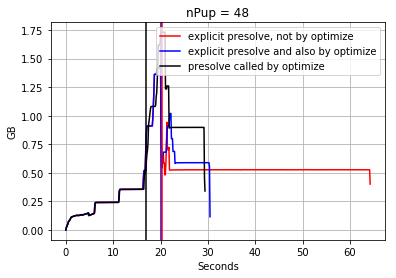

In [144]:
optimize = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190205154156.dat', delimiter=' ', skip_header=1)
pre_turn_off_after = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190205153700.dat', delimiter=' ', skip_header=1)
presolve = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190205154101.dat', delimiter=' ', skip_header=1)

optimize_opt = 1549399333.0416708 - optimize[0,2]
presolve_opt = 1549399281.3267689 - presolve[0,2]
pre_turn_off_after_opt = 1549399041.16974 - pre_turn_off_after[0,2]

plt.plot((pre_turn_off_after[:,2]-pre_turn_off_after[0,2]), pre_turn_off_after[:,1]*1.024e-3, 'r-', label='explicit presolve, not by optimize')
plt.plot((presolve[:,2]-presolve[0,2]), presolve[:,1]*1.024e-3, 'b-', label='explicit presolve and also by optimize')
plt.plot((optimize[:,2]-optimize[0,2]), optimize[:,1]*1.024e-3, 'k-', label='presolve called by optimize')

plt.axvline(x=optimize_opt, c='k')
plt.axvline(x=presolve_opt, c='b')
plt.axvline(x=pre_turn_off_after_opt, c='r')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48')
plt.legend(loc = 'upper right')
plt.show

<function matplotlib.pyplot.show>

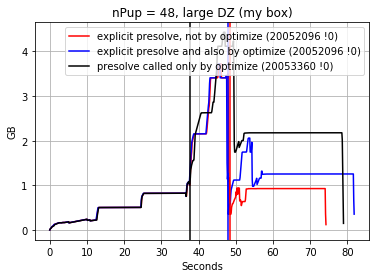

In [143]:
#optimize = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206092358.dat', delimiter=' ', skip_header=1)
optimize = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206103738.dat', delimiter=' ', skip_header=1)

#pre_turn_off_after = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206094757.dat', delimiter=' ', skip_header=1)
pre_turn_off_after = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206110512.dat', delimiter=' ', skip_header=1)

presolve = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206092631.dat', delimiter=' ', skip_header=1)


optimize_opt = 1549467495.69171 - optimize[0,2]
presolve_opt = 1549463239.7434938 - presolve[0,2]
pre_turn_off_after_opt = 1549469161.0602088 - pre_turn_off_after[0,2]

plt.plot((pre_turn_off_after[:,2]-pre_turn_off_after[0,2]), pre_turn_off_after[:,1]*1.024e-3, 'r-', label='explicit presolve, not by optimize (20052096 !0)')
plt.plot((presolve[:,2]-presolve[0,2]), presolve[:,1]*1.024e-3, 'b-', label='explicit presolve and also by optimize (20052096 !0)')
plt.plot((optimize[:,2]-optimize[0,2]), optimize[:,1]*1.024e-3, 'k-', label='presolve called only by optimize (20053360 !0)')

plt.axvline(x=optimize_opt, c='k')
plt.axvline(x=presolve_opt, c='b')
plt.axvline(x=pre_turn_off_after_opt, c='r')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48, large DZ (my box)')
plt.legend(loc = 'upper right')
plt.show

In [ ]:
p = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206103738.dat', delimiter=' ', skip_header=1)
p_opt = 1549467495.69171 - p[0,2]

plt.plot((p[:,2]-p[0,2]), p[:,1]*1.024e-3, 'k-')

In [ ]:
p = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190206110512.dat', delimiter=' ', skip_header=1)
p_opt = 1549469161.0602088 - p[0,2]

plt.plot((p[:,2]-p[0,2]), p[:,1]*1.024e-3, 'r-')

<function matplotlib.pyplot.show>

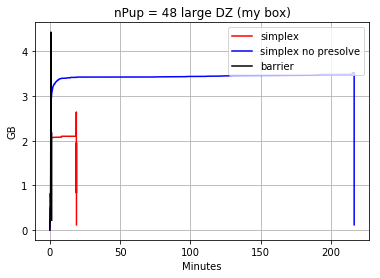

In [142]:
simplex = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190207123651.dat', delimiter=' ', skip_header=1)
simplex_wo_presolve = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190207154818.dat', delimiter=' ', skip_header=1)

barrier = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190207121622.dat', delimiter=' ', skip_header=1)


plt.plot((simplex[:,2]-simplex[0,2])/60, simplex[:,1]*1.024e-3, 'r-', label='simplex')
plt.plot((simplex_wo_presolve[:,2]-simplex_wo_presolve[0,2])/60, simplex_wo_presolve[:,1]*1.024e-3, 'b-', label='simplex no presolve')
plt.plot((barrier[:,2]-barrier[0,2])/60, barrier[:,1]*1.024e-3, 'k-', label='barrier')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Minutes')
plt.title('nPup = 48 large DZ (my box)')
plt.legend(loc = 'upper right')
plt.show

<function matplotlib.pyplot.show>

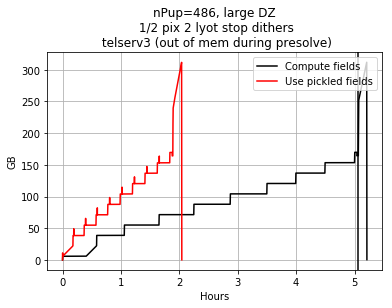

In [141]:

dat = np.genfromtxt('/Users/jnoss/dev/makidon-labs/486-test/./mprofile_20190207103950-486-lrgdz-half-pix-2-dith.dat', delimiter=' ', skip_header=1)


use_pickeld = np.genfromtxt('/user/jnoss/mprofile_20190211142029.dat', delimiter=' ', skip_header=1)

plt.plot((dat[:,2]-dat[0,2])/60**2, dat[:,1]*1.024e-3, 'k-', label='Compute fields')
plt.plot((use_pickeld[:,2]-use_pickeld[0,2])/60**2, use_pickeld[:,1]*1.024e-3, 'r-', label='Use pickled fields')

plt.axvline(x=(1549572179.1209466 - dat[0,2])/60**2, c='k')


plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Hours')
plt.title('nPup=486, large DZ\n 1/2 pix 2 lyot stop dithers\n telserv3 (out of mem during presolve)')
plt.legend(loc = 'upper right')
plt.show

In [ ]:
s = simplex[-1,2]-simplex[0,2]
s_wo_pre = simplex_wo_presolve[-1,2]-simplex_wo_presolve[0,2]
b = barrier[-1,2]-barrier[0,2]

print(s_wo_pre/s)
print(s_wo_pre/b)

<function matplotlib.pyplot.show>

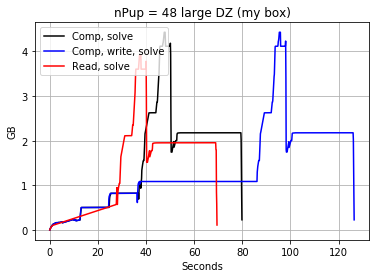

In [140]:
#norm = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208113020.dat', delimiter=' ', skip_header=1)
norm = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208115845.dat', delimiter=' ', skip_header=1)

write = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208114024.dat', delimiter=' ', skip_header=1)

read = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208110521.dat', delimiter=' ', skip_header=1)


plt.plot((norm[:,2]-norm[0,2]), norm[:,1]*1.024e-3, 'k-', label='Comp, solve')
plt.plot((write[:,2]-write[0,2]), write[:,1]*1.024e-3, 'b-', label='Comp, write, solve')
plt.plot((read[:,2]-read[0,2]), read[:,1]*1.024e-3, 'r-', label='Read, solve')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('nPup = 48 large DZ (my box)')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
read = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208110521.dat', delimiter=' ', skip_header=1)
plt.plot((read[:,2]-read[0,2]), read[:,1]*1.024e-3, 'g-', label='Read, solve')
plt.show

<function matplotlib.pyplot.show>

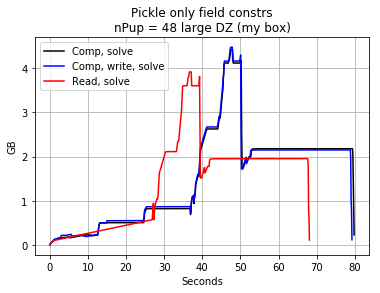

In [139]:
norm = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208115845.dat', delimiter=' ', skip_header=1)

write = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208153430.dat', delimiter=' ', skip_header=1)

read = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190208153139.dat', delimiter=' ', skip_header=1)


plt.plot((norm[:,2]-norm[0,2]), norm[:,1]*1.024e-3, 'k-', label='Comp, solve')
plt.plot((write[:,2]-write[0,2]), write[:,1]*1.024e-3, 'b-', label='Comp, write, solve')
plt.plot((read[:,2]-read[0,2]), read[:,1]*1.024e-3, 'r-', label='Read, solve')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.title('Pickle only field constrs\nnPup = 48 large DZ (my box)')
plt.legend(loc = 'upper left')
plt.show

In [ ]:
def mem_footprint(ndz, nlam, npp, size, scale, nCorona):
    e_field = ndz*2 # complex => *2
    fields = e_field*nlam
    delta_fields = fields*2 # Aconst - fields & Aconst + fields
    #print(delta_fields)

    array_of_fields = npp * delta_fields * nCorona
    #print(array_of_fields)

    I = npp**2
    negI = I

    nNonZeros = array_of_fields + I + negI
    #print(final_array)

    #print(final_array*size/1e9)

    b = delta_fields + npp*2
    c = npp

    total = nNonZeros + b + c
    
    # A + b + c (wo/identity mat)
    at_least = nNonZeros/2 + delta_fields + npp
    
    n_constrs = ndz*nlam*2
    terms_per_f_constr = npp
    tot_per_f_constr = terms_per_f_constr*2 + 1 # val + var + rhs
    
    tot_constr = tot_per_f_constr*n_constrs
    
    identity_constr = npp*2 + 1 #val + var + rhs
    gurobi = tot_constr + identity_constr*2
    
    nz = delta_fields + npp*2 # ndz
    
    return total*size/scale, at_least*size/scale, gurobi*size/scale, nNonZeros

# Memory footprint scaling

## 48, ldz, nImg2d = 65

### nlam = 1
```ndz = 2644, npp = 1264, Optimize a model with 13104 rows, 1264 columns and 13370592 nonzeros, mprofile_20190218115541
optimize:  1550508955.251071```

### nlam = 2
```ndz = 2644, npp = 1264, Optimize a model with 23680 rows, 1264 columns and 26738656 nonzeros, mprofile_20190218115632
optimize:  1550509018.8267798```

### nlam = 3
```ndz = 2644, npp = 1264, Optimize a model with 34256 rows, 1264 columns and 40106720 nonzeros, mprofile_20190218115822
optimize:  1550509141.012335```
 
## Some specs

sdz = 952 # IWA=5, OWA=10
ldz = 2644 # IWA=3.75, OWA = 15.00
ndz = ldz

npp486=132196
npp48=1264

In [4]:
def non_zeros(ndz, npp, nlam, ncorona):
    e_field = ndz*2 # complex => *2
    delta_fields = e_field*2 # Aconst - fields & Aconst + fields
    
    fields = delta_fields*npp*nlam

    
    tot_corona = fields*ncorona
    
    I = npp
    
    # (ndz*2*2*npp + npp*2)*nlam*ncorona
    
    return tot_corona + I*2 # *2 -> I & -I

In [5]:
def presolve(data, t_opt):
    m = max(data[:,1])
    pre_presolve = max([m for m, t in zip(data[:,1], data[:,2]) if t < t_opt])
    presolve = m - pre_presolve
                                          
    return pre_presolve, presolve, m

In [10]:
nlam1 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190218115541.dat', delimiter=' ', skip_header=1)
nlam2 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190218115632.dat', delimiter=' ', skip_header=1)
nlam3 = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190218115822.dat', delimiter=' ', skip_header=1)

x, y, z = presolve(nlam1, 1550508955.251071), presolve(nlam2, 1550509018.8267798) , presolve(nlam3, 1550509141.012335)
#print(z/x, y/z, z-y, y-x)
#print(40106720/13370592, 26738656/13370592, 26738656 - 13370592, 40106720 - 26738656)
print("B/NZ for model:", x[0]*1024**2/13370592, y[0]*1024**2/26738656, z[0]*1024**2/40106720)
print("B/NZ used by presolve:", x[1]*1024**2/13370592, y[1]*1024**2/26738656, z[1]*1024**2/40106720)
print("B/NZ peak:", x[2]*1024**2/13370592, y[2]*1024**2/26738656, z[2]*1024**2/40106720)

print(z[2]/x[2], y[2]/x[2])

scale = 1024**2/1e9 # MiB -> GB
plt.plot((nlam1[:,2]-nlam1[0,2]), nlam1[:,1]*scale, 'k-')
plt.plot((nlam2[:,2]-nlam2[0,2]), nlam2[:,1]*scale, 'b-')
plt.plot((nlam3[:,2]-nlam3[0,2]), nlam3[:,1]*scale, 'r-')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.show

OSError: /Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190218115541.dat not found.

In [63]:
d = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190218150004.dat', delimiter=' ', skip_header=1)
dm = presolve(d, 1550520009.586278)
dm[1]*1024**2/3258592

99.66505280128843

# Memory footprint scaling

## 486, ldz, nImg2d = 65

### nlam = 1

```optimize:  1550591882.669416
Optimize a model with 274968 rows, 132196 columns and 1398369272 nonzeros
Coefficient statistics:
  Matrix range     [9e-13, 1e+00]
  Objective range  [8e-06, 8e-06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 0 columns (presolve time = 52s) ...
Presolve removed 0 rows and 132196 columns (presolve time = 89s) ...
Presolve removed 0 rows and 269680 columns (presolve time = 139s) ...
Presolve removed 0 rows and 269680 columns (presolve time = 266s) ...
Presolve removed 0 rows and 269680 columns (presolve time = 290s) ...
Presolve removed 0 rows and 269680 columns (presolve time = 298s) ...
Presolve removed 0 rows and 269680 columns (presolve time = 309s) ...
Presolve removed 0 rows and 269680 columns
Presolve time: 342.62s
Presolved: 132196 rows, 137484 columns, 699184636 nonzeros```

### nlam = 2

```optimize:  1550595564.6108606
Optimize a model with 285544 rows, 132196 columns and 2796474168 nonzeros
Coefficient statistics:
  Matrix range     [9e-13, 1e+00]
  Objective range  [8e-06, 8e-06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 0 columns (presolve time = 201s) ...
Presolve removed 0 rows and 132196 columns (presolve time = 206s) ...
Presolve removed 0 rows and 132196 columns (presolve time = 290s) ...
Presolve removed 0 rows and 274968 columns (presolve time = 494s) ...
Presolve removed 0 rows and 274968 columns (presolve time = 923s) ...
Presolve removed 0 rows and 274968 columns (presolve time = 978s) ...
Presolve removed 0 rows and 274968 columns (presolve time = 1002s) ...
Presolve removed 0 rows and 274968 columns (presolve time = 1033s) ...
Presolve removed 0 rows and 274968 columns
Presolve time: 1119.90s
Presolved: 132196 rows, 142772 columns, 1398237084 nonzeros```

### nlam = 3
```optimize:  1550607484.561992
Optimize a model with 296120 rows, 132196 columns and 4194579064 nonzeros
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [8e-06, 8e-06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 0 columns (presolve time = 457s) ...
Presolve removed 0 rows and 132196 columns (presolve time = 475s) ...
Presolve removed 0 rows and 132196 columns (presolve time = 623s) ...
Presolve removed 0 rows and 280256 columns (presolve time = 837s) ...
Presolve removed 0 rows and 280256 columns (presolve time = 1368s) ...
Presolve removed 0 rows and 280256 columns (presolve time = 1463s) ...
Presolve removed 0 rows and 280256 columns (presolve time = 1498s) ...
Presolve removed 0 rows and 280256 columns (presolve time = 1545s) ...
Presolve removed 0 rows and 280256 columns
Presolve time: 1671.42s
Presolved: 132196 rows, 148060 columns, 2097289532 nonzeros```

In [22]:
# Using pickled data

nlam1 = np.genfromtxt('/user/jnoss/mprofile_20190219104642.dat', delimiter=' ', skip_header=1)
nlam2 = np.genfromtxt('/user/jnoss/mprofile_20190219113540.dat', delimiter=' ', skip_header=1)
nlam3 = np.genfromtxt('/user/jnoss/mprofile_20190219144218.dat', delimiter=' ', skip_header=1)

x, y, z = presolve(nlam1, 1550591882.669416), presolve(nlam2, 1550595564.6108606) , presolve(nlam3, 1550607484.561992)
#print(z/x, y/z, z-y, y-x)
#print(40106720/13370592, 26738656/13370592, 26738656 - 13370592, 40106720 - 26738656)
print("B/NZ for model:", x[0]*1024**2/1398369272, y[0]*1024**2/2796474168, z[0]*1024**2/4194579064)
print("B/NZ used by presolve:", x[1]*1024**2/1398369272, y[1]*1024**2/2796474168, z[1]*1024**2/4194579064)
print("B/NZ peak:", x[2]*1024**2/1398369272, y[2]*1024**2/2796474168, z[2]*1024**2/4194579064)
print("presolve/model:", x[1]/x[0], y[1]/y[0], z[1]/z[0])
print("ratio of NZ/base:",2796474168/1398369272, 4194579064/1398369272 )

scale = 1024**2/1e9 # MiB -> GB
plt.plot((nlam1[:,2]-nlam1[0,2]), nlam1[:,1]*scale, 'k-')
plt.plot((nlam2[:,2]-nlam2[0,2]), nlam2[:,1]*scale, 'b-')
plt.plot((nlam3[:,2]-nlam3[0,2]), nlam3[:,1]*scale, 'r-')

plt.grid(True)
plt.ylabel('GB')
plt.xlabel('Seconds')
plt.show

B/NZ for model: 28.201149110875097 20.101347058822537 17.402811842194424
B/NZ used by presolve: 126.20928239065464 83.24041911612532 83.45097549656347
B/NZ peak: 154.41043150152973 103.34176617494786 100.8537873387579
presolve/model: 4.475324104505552 4.141036860491938 4.795258160191695
ratio of NZ/base: 1.9998109397815773 2.9996218795631546


<function matplotlib.pyplot.show(*args, **kw)>

In [50]:
print(y[1]/y[0], x[1]/x[0])

ldz=2644
npp486=132196

print(ldz*npp486*16/1e9)

print(non_zeros(ldz, npp486,2, 1)*(12)/1e9)
print(y[0]*scale)

4.141036860491938 4.475324104505552
5.592419584
33.557690208
56.21289779200001


# C vs F storage order

## F order (column)

```optimize:  1550587832.4220412
Optimize a model with 34256 rows, 1264 columns and 40106720 nonzeros
Coefficient statistics:
  Matrix range     [8e-10, 1e+00]
  Objective range  [8e-04, 8e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 18392 columns (presolve time = 6s) ...
Presolve removed 0 rows and 18392 columns (presolve time = 10s) ...
Presolve removed 0 rows and 18392 columns
Presolve time: 11.64s
Presolved: 1264 rows, 17128 columns, 20053360 nonzeros```

## C order (row)

```optimize:  1550587952.342091
Optimize a model with 34256 rows, 1264 columns and 40106720 nonzeros
Coefficient statistics:
  Matrix range     [8e-10, 1e+00]
  Objective range  [8e-04, 8e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 18392 columns (presolve time = 6s) ...
Presolve removed 0 rows and 18392 columns (presolve time = 10s) ...
Presolve removed 0 rows and 18392 columns
Presolve time: 11.68s
Presolved: 1264 rows, 17128 columns, 20053360 nonzeros```

In [115]:
f = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190219094955.dat', delimiter=' ', skip_header=1)
c = np.genfromtxt('/Users/jnoss/dev/makidon-labs/SCDA2/mprofile_20190219095153.dat', delimiter=' ', skip_header=1)




In [51]:
4194579064*3/1e9

12.583737192

In [52]:
195465*235725/1e9

46.075987125

In [53]:
486**2

236196

In [ ]:
132196*